<h1 align="center">Lending Club Case Study</h1>
</br>
<h5 align="center" font-style="bold">Authors: 
  Ravi Pandey,
  Neha Bansal</h5>
    
 
<h4>Problem Statement</h4>

<p>When the company receives a loan application, then company has to make a decision for loan approval based on the applicant’s profile so there will be 2 types of risks are associated with the bank’s decision: <p>
    
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company 
    
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company 
        

<h4>OBJECTIVE</h4>
<p>Apply EDA to understand how consumer attributes and loan attributes influence the risk.</p>

In [165]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [166]:
loandf=pd.read_csv("loan//loan.csv",low_memory=False)
#low memory flag to load columns with multiple data types

In [167]:
loandf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [168]:
loandf.shape

(39717, 111)

In [169]:
#As we have 111 columns, so increasing max number of columns we used below code
pd.set_option('display.max_columns', 150)

In [170]:
loandf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [171]:
loandf.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<h1 align="center"> EDA </h1>


#### Missing Values Analysis

In [172]:
missingvalues=round(100*loandf.isnull().sum()/loandf.shape[0],2)
#here we are finding len of index first and then trying to find how much % is missed for each column we will get a series as output

In [173]:
len(missingvalues[missingvalues==100])

54

###### From above observation, We have 54 columns, which have 100% missing value, So the first step will be to remove those features/columns

In [174]:
rem_col=list(missingvalues[missingvalues==100].index)

In [175]:
#Dropping columns in which we have 100% missing value
loandf=loandf.drop(rem_col,axis=1)

In [176]:
loandf.shape

(39717, 57)

###### Now we have 57 features remaining, Next step will be to find out missing values on those remaining features

In [177]:
missingvalues=round(100*loandf.isnull().sum()/loandf.shape[0],2)

In [178]:
missingvalues[missingvalues>0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [179]:
len(missingvalues[missingvalues>0])

14

- next_pymnt_d and mths_since_last_record having approx 93% missing values, by looking into the data description file , we found that we don't require next scheduled payment date and The number of months since the last public record for our analysis hence we can remove this column
- We don't require below columns for our analysis hence we can remove those columns as well
  <br /> mths_since_last_delinq- The number of months since the borrower's last delinquency.
  <br /> desc- Loan description provided by the borrower


In [180]:
loandf=loandf.drop(["next_pymnt_d","mths_since_last_record","mths_since_last_delinq","desc"],axis=1)

In [181]:
loandf.shape

(39717, 53)

In [182]:
missingvalues=round(100*loandf.isnull().sum()/loandf.shape[0],2)

In [183]:
rem_values=missingvalues[missingvalues>0]
rem_values

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

<b> Now for above columns let's find the uniqueness first <b>

In [184]:
loandf[list(rem_values.index)].nunique()

emp_title                     28820
emp_length                       11
title                         19615
revol_util                     1089
last_pymnt_d                    101
last_credit_pull_d              106
collections_12_mths_ex_med        1
chargeoff_within_12_mths          1
pub_rec_bankruptcies              3
tax_liens                         1
dtype: int64

<b> We have seen that column <i> collections_12_mths_ex_med,chargeoff_within_12_mths and tax_liens <i/> having only one value in the data, hence we can drop those columns for our Analysis <b>

In [185]:
loandf=loandf.drop(["collections_12_mths_ex_med","chargeoff_within_12_mths","tax_liens"],axis=1)

In [186]:
loandf.shape

(39717, 50)

In [187]:
missingvalues=round(100*loandf.isnull().sum()/loandf.shape[0],2)

In [188]:
missingvalues[missingvalues>0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

#### Now we have 7 columns on which we have less then 7% null values, so those null values may give us wrong analysis, so let's drop those rows or replace the mising values by using central tendancy. 


- <b> emp_title emp_length title and last_pymnt_d contains categorical data, Hence the best option is remove the null rows <b>
- <b> revol_util contains multiples unique values and also the missing percentage is only .13, Hence we are delting missing rows <b>

In [189]:
loandf=loandf[~loandf.emp_title.isnull()]
loandf=loandf[~loandf.emp_length.isnull()]
loandf=loandf[~loandf.title.isnull()]
loandf=loandf[~loandf.revol_util.isnull()]
loandf=loandf[~loandf.last_pymnt_d.isnull()]

In [190]:

print("pub_rec_bankruptcies",loandf.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies 0.0    34931
1.0     1495
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In [191]:
print(loandf.pub_rec_bankruptcies.describe(),"Mode",loandf.pub_rec_bankruptcies.mode())

count    36433.000000
mean         0.041418
std          0.200221
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64 Mode 0    0.0
dtype: float64


<b> As we can see above For column pub_rec_bankruptcies we have IQR is 0 between 25 to 75% and mode is also 0 hence we are replacing null values with 0  <b>

In [192]:
loandf.pub_rec_bankruptcies.fillna(0,inplace=True)

In [193]:
missingvalues=round(100*loandf.isnull().sum()/loandf.shape[0],2)
missingvalues[missingvalues>0]

Series([], dtype: float64)

In [194]:


loandf.shape

(37087, 50)

### Let's Do Some Analysis

In [195]:
loandf.loan_status.unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [196]:
loandf.loan_status.value_counts()

Fully Paid     30966
Charged Off     5055
Current         1066
Name: loan_status, dtype: int64

**Observations**:<br>
We have Highest number of people who fully paid there loan.

**NOTE**<br>For further analysis we don't require Current loan status users, As they already got loan hence we are not taking those users for our analysis

In [197]:
loandf=loandf[loandf.loan_status!="Current"]

In [198]:
loandf.shape

(36021, 50)

Before Doing Univariate analysis, Let's find some correlation between features

In [199]:
loandf.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
id,1.000000,0.993501,0.122789,0.133883,0.236479,0.077956,0.007560,0.089369,-0.008841,-0.041934,0.017534,-0.020645,-0.002536,0.038461,NaN,NaN,0.112787,0.198900,0.095413,0.123727,-0.057374,0.042235,-0.006718,0.148312,NaN,NaN,NaN,-0.001406
member_id,0.993501,1.000000,0.122963,0.133299,0.246767,0.073025,0.008755,0.090703,-0.008335,-0.046841,0.015049,-0.020488,-0.005896,0.040786,NaN,NaN,0.114626,0.209857,0.096624,0.127535,-0.060254,0.040215,-0.008372,0.148743,NaN,NaN,NaN,-0.000635
loan_amnt,0.122789,0.122963,1.000000,0.981555,0.936380,0.931156,0.255221,0.063460,-0.034225,0.011759,0.172982,-0.046431,0.316636,0.254679,NaN,NaN,0.883695,0.848080,0.848257,0.728637,0.045384,0.143143,0.078625,0.475617,NaN,NaN,NaN,-0.029698
funded_amnt,0.133883,0.133299,0.981555,1.000000,0.954872,0.957155,0.250712,0.063488,-0.034350,0.011975,0.171440,-0.047159,0.309082,0.248756,NaN,NaN,0.900705,0.865166,0.866670,0.737269,0.047632,0.143508,0.080302,0.479530,NaN,NaN,NaN,-0.030976
funded_amnt_inv,0.236479,0.246767,0.936380,0.954872,1.000000,0.902668,0.238048,0.072491,-0.040995,-0.003854,0.158422,-0.049025,0.287649,0.240981,NaN,NaN,0.875391,0.910865,0.839555,0.726577,0.027511,0.132764,0.067958,0.469863,NaN,NaN,NaN,-0.032220
installment,0.077956,0.073025,0.931156,0.957155,0.902668,1.000000,0.252145,0.053819,-0.022285,0.010568,0.169503,-0.042616,0.313150,0.228525,NaN,NaN,0.859576,0.817016,0.849734,0.642203,0.055494,0.120989,0.078410,0.412466,NaN,NaN,NaN,-0.028397
annual_inc,0.007560,0.008755,0.255221,0.250712,0.238048,0.252145,1.000000,-0.121155,0.022538,0.035390,0.153049,-0.013866,0.272746,0.231433,NaN,NaN,0.243169,0.232310,0.243006,0.177484,0.005110,0.022379,0.016633,0.135509,NaN,NaN,NaN,-0.010741
dti,0.089369,0.090703,0.063460,0.063488,0.072491,0.053819,-0.121155,1.000000,-0.035317,0.002905,0.289225,-0.005521,0.227922,0.228651,NaN,NaN,0.059906,0.067513,0.037035,0.104069,-0.009643,0.027084,0.012140,0.009167,NaN,NaN,NaN,0.007619
delinq_2yrs,-0.008841,-0.008335,-0.034225,-0.034350,-0.040995,-0.022285,0.022538,-0.035317,1.000000,0.007916,0.010164,0.010682,-0.054278,0.066318,NaN,NaN,-0.024879,-0.031722,-0.040258,0.022076,0.027557,0.013468,0.016660,-0.013383,NaN,NaN,NaN,0.005023
inq_last_6mths,-0.041934,-0.046841,0.011759,0.011975,-0.003854,0.010568,0.035390,0.002905,0.007916,1.000000,0.093801,0.022962,-0.020809,0.113793,NaN,NaN,-0.008265,-0.019112,-0.020824,0.025097,0.030481,0.017938,0.013002,0.029668,NaN,NaN,NaN,0.013533


**Observation**
<br>After analyzing the correlation between features, We found that: 
    <br><b>Loan Amount,funded Amount and funded amount_inv are highly correlated with each other </b>
        <br><b>pub_rec and pub_rec_bankruptcies are also correlated with each other </b>

In [200]:
print(loandf.columns)
print(loandf.shape[1])

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')
50


In [201]:
[i+" : "+str(loandf[i].nunique()) for i in list(loandf.columns)]

['id : 36021',
 'member_id : 36021',
 'loan_amnt : 857',
 'funded_amnt : 1007',
 'funded_amnt_inv : 7652',
 'term : 2',
 'int_rate : 368',
 'installment : 14413',
 'grade : 7',
 'sub_grade : 35',
 'emp_title : 27890',
 'emp_length : 11',
 'home_ownership : 5',
 'annual_inc : 4893',
 'verification_status : 3',
 'issue_d : 55',
 'loan_status : 2',
 'pymnt_plan : 1',
 'url : 36021',
 'purpose : 14',
 'title : 18048',
 'zip_code : 817',
 'addr_state : 50',
 'dti : 2842',
 'delinq_2yrs : 11',
 'earliest_cr_line : 509',
 'inq_last_6mths : 9',
 'open_acc : 40',
 'pub_rec : 5',
 'revol_bal : 20573',
 'revol_util : 1081',
 'total_acc : 80',
 'initial_list_status : 1',
 'out_prncp : 1',
 'out_prncp_inv : 1',
 'total_pymnt : 34388',
 'total_pymnt_inv : 34103',
 'total_rec_prncp : 6318',
 'total_rec_int : 32043',
 'total_rec_late_fee : 1215',
 'recoveries : 3652',
 'collection_recovery_fee : 2414',
 'last_pymnt_d : 101',
 'last_pymnt_amnt : 32523',
 'last_credit_pull_d : 106',
 'policy_code : 1',


 id : 36021 <br />
 member_id : 36021 <br /> 
 policy_code : 1 <br />
 application_type : 1 <br />
 acc_now_delinq : 1 <br />
 delinq_amnt : 1 <br />
 zip_code : 817 <br />
 initial_list_status : 1 <br />
 out_prncp : 1 <br /> 
 out_prncp_inv : 1 <br />
 pymnt_plan : 1 <br />

<b>As we can see</b>
<ul>
  <li>We have policy_code,application_type,acc_now_delinq,delinq_amnt,zip_code,initial_list_status,out_prncp,out_prncp_inv and pymnt_plan has only 1 entry so we can ignore those columns for our analysis</li>
  <li>id, Member_id has unique values, So we can ignore those columns as well for our analysis</li>

</ul>
    

    

## Univariate Analysis

In [202]:
loandf.loan_amnt.dtype

dtype('int64')

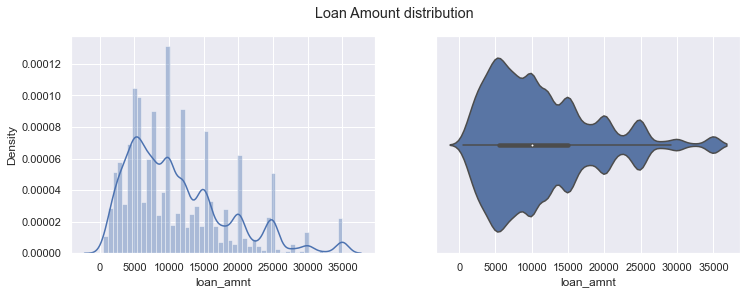

count    36021.000000
mean     11115.148802
std       7311.306957
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [203]:
sns.set(rc={"figure.figsize": (12, 4)});
plt.subplot(1,2,1)
ax = sns.distplot(loandf.loan_amnt)
plt.suptitle('Loan Amount distribution')
plt.subplot(1,2,2)
ax1=sns.violinplot(x=loandf["loan_amnt"])
plt.show()
print(loandf.loan_amnt.describe())


**Observations**:<br>
As per above observation, Most of the people are Likely to take around 10K loan from Lending Club.

In [204]:
loandf.funded_amnt.dtype

dtype('int64')

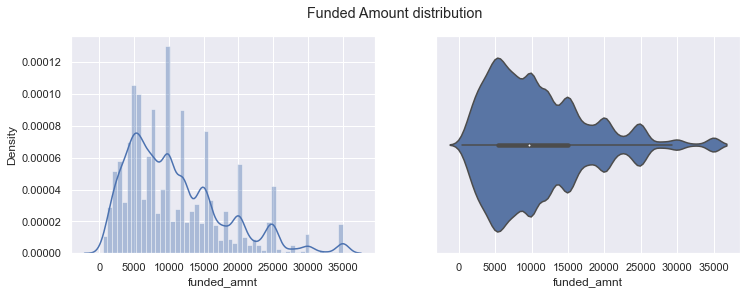

count    36021.000000
mean     10850.993865
std       7057.504887
min        500.000000
25%       5450.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


In [205]:
sns.set(rc={"figure.figsize": (12, 4)});
plt.subplot(1,2,1)
ax = sns.distplot(loandf.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.subplot(1,2,2)
ax1=sns.violinplot(x=loandf["funded_amnt"])
plt.show()

print(loandf.funded_amnt.describe())


**Observations**:<br>
We already saw that, Loan Amount and Funded amount are Highly correlated and by seeing the above graph, we found that lending club approves approx all the loan Amount.

In [206]:
loandf.funded_amnt_inv.dtype

dtype('float64')

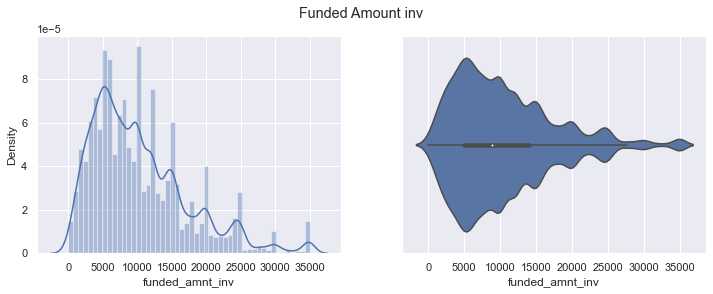

count    36021.000000
mean     10281.019840
std       6993.120225
min          0.000000
25%       5000.000000
50%       8900.000000
75%      14046.422200
max      35000.000000
Name: funded_amnt_inv, dtype: float64


In [207]:
sns.set(rc={"figure.figsize": (12, 4)});
plt.subplot(1,2,1)
ax = sns.distplot(loandf.funded_amnt_inv)
plt.suptitle('Funded Amount inv')
plt.subplot(1,2,2)
ax1=sns.violinplot(x=loandf["funded_amnt_inv"])
plt.show()

print(loandf.funded_amnt_inv.describe())


**Observations**:<br>
We already saw that, Funded Amount Investment is Highly Positively correlated with Funded amount and loan amount, Hence we can state that Lending club approves and invest on all the loan amounts  

In [208]:
loandf.term.dtype

dtype('O')

Text(0.5, 0.98, 'Term')

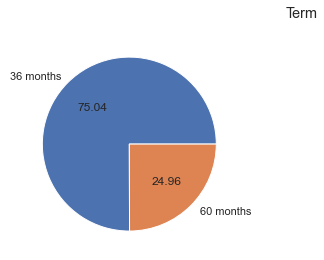

In [209]:
plt.figure(figsize=(12,4))
ax1 = plt.subplot(121, aspect='equal')
loandf.groupby('term').size().plot(kind='pie', autopct='%.2f')
plt.axis('off')
plt.suptitle("Term")

**Observations**:<br>
75% people have taken option of 36 months, for number of payments on the loan whereas 25% people has taken option of 25%

In [210]:
loandf.int_rate.dtype

dtype('O')

In [211]:
#conversion to float
loandf.int_rate = loandf.int_rate.str.strip('%').astype(float)

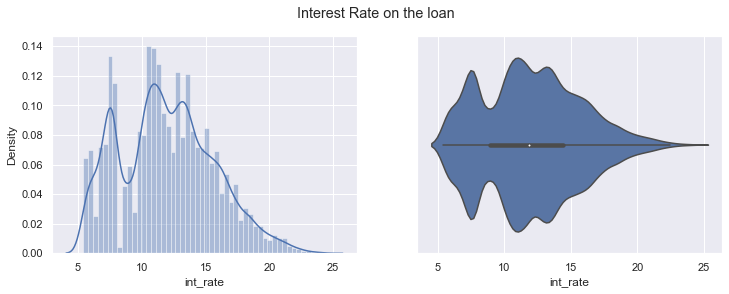

count    36021.000000
mean        11.960184
std          3.683246
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64


In [212]:
sns.set(rc={"figure.figsize": (12, 4)});
plt.subplot(1,2,1)
ax = sns.distplot(loandf.int_rate)
plt.suptitle('Interest Rate on the loan')
plt.subplot(1,2,2)
ax1=sns.violinplot(x=loandf["int_rate"])
plt.show()
print(loandf.int_rate.describe())

As we can see above, We have object type int_rate, So for analyis let's convert this object type to float type

**Observations**:<br>
From the above observation we can see that most of interest rate lies between 8.9 to 14.5%

In [213]:
loandf.installment.dtype

dtype('float64')

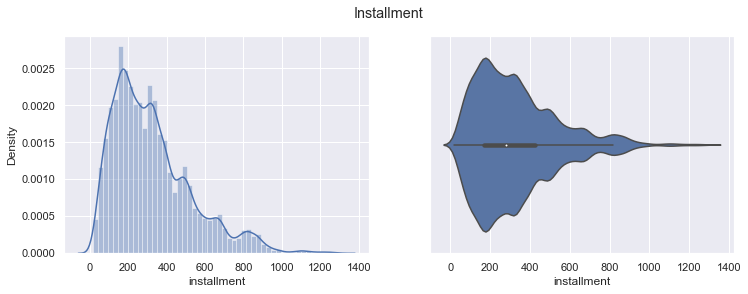

count    36021.000000
mean       324.124189
std        207.214565
min         16.080000
25%        167.730000
50%        280.910000
75%        426.990000
max       1305.190000
Name: installment, dtype: float64


In [214]:
sns.set(rc={"figure.figsize": (12, 4)});
plt.subplot(1,2,1)
ax = sns.distplot(loandf.installment)
plt.suptitle('Installment')
plt.subplot(1,2,2)
ax1=sns.violinplot(x=loandf["installment"])
plt.show()
print(loandf.installment.describe())

**Observations**:<br>
From the above analysis we can say that average installment amount is 324 whereas highest installment amount is 1305.


In [215]:
loandf.grade.dtype

dtype('O')

Text(0.5, 0.98, 'Grade')

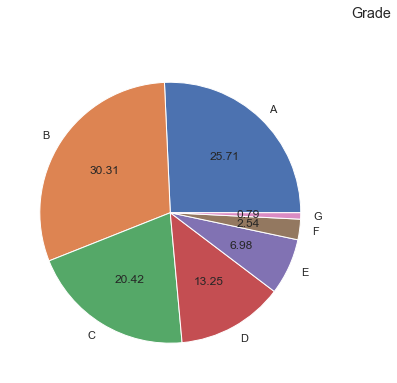

In [216]:
plt.figure(figsize=(14,6))
ax1 = plt.subplot(121, aspect='equal')
loandf.groupby('grade').size().plot(kind='pie', autopct='%.2f')
plt.axis('off')
plt.suptitle("Grade")

**Observations**:<br>
From the above analysis we can analyse that Highest LC assigned loan grade belongs to B

In [217]:
loandf.sub_grade.dtype

dtype('O')

Text(0.5, 0.98, 'Sub Grade')

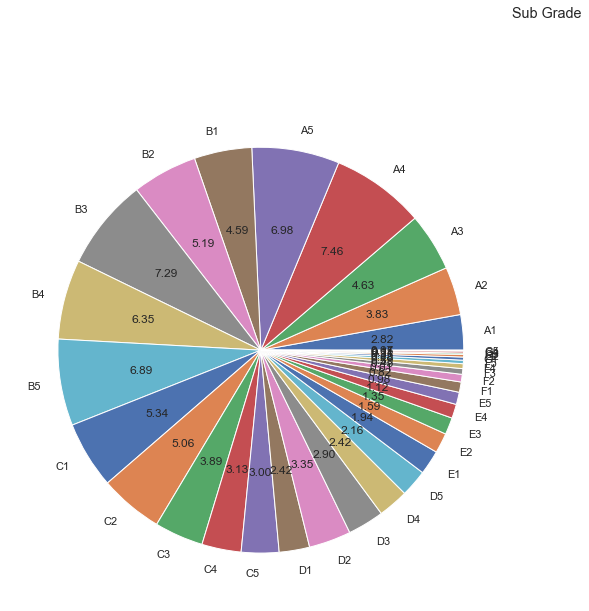

In [218]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(121, aspect='equal')
loandf.groupby('sub_grade').size().plot(kind='pie', autopct='%.2f')
plt.axis('off')
plt.suptitle("Sub Grade")

**Observations**:<br>
    
As we already know that LC has highest loan assigned on Grade B, so if we go further in sub grade we found that sub grade B3 has Highest LC loan assigned.

In [219]:
loandf.emp_length.dtype

dtype('O')

Text(0.5, 0.98, 'Emp Length')

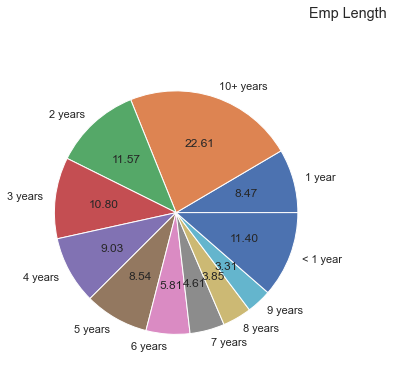

In [220]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect='equal')
loandf.groupby('emp_length').size().plot(kind='pie', autopct='%.2f')
plt.axis('off')
plt.suptitle("Emp Length")

**Observations**:<br>
People who have maturity greater than 10 years are borrowing more arount 22%

In [221]:
loandf.home_ownership.dtype

dtype('O')

Text(0.5, 0.98, 'Home Ownership')

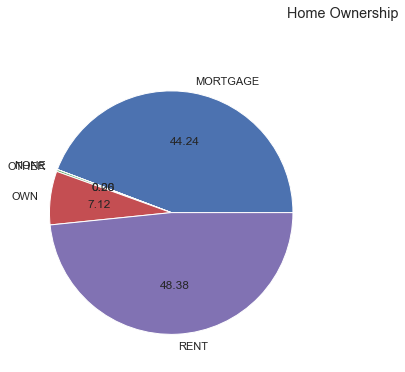

In [222]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect='equal')
loandf.groupby('home_ownership').size().plot(kind='pie', autopct='%.2f')
plt.axis('off')
plt.suptitle("Home Ownership")

**Observations**:<br>
Mostly loan borrowers are from Mortgage or Rented house. 

In [223]:
loandf.verification_status.dtype

dtype('O')

Text(0.5, 0.98, 'verification status')

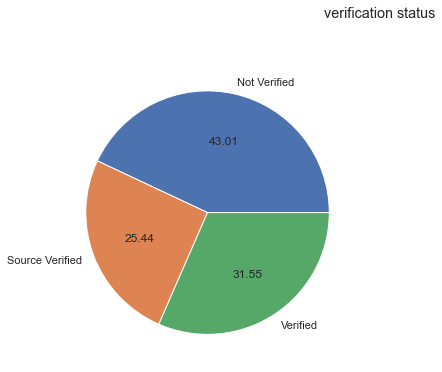

In [224]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect='equal')
loandf.groupby('verification_status').size().plot(kind='pie', autopct='%.2f')
plt.axis('off')
plt.suptitle("verification status")

**Observations**:<br>

Above observation Indicates that LC has 43% of Borrowers, whose incomes are not verified  

In [225]:
loandf.verification_status.dtype

dtype('O')

Text(0.5, 0.98, 'Loan status')

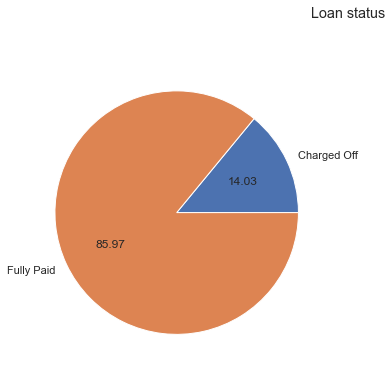

In [226]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect='equal')
loandf.groupby('loan_status').size().plot(kind='pie', autopct='%.2f')
plt.axis('off')
plt.suptitle("Loan status")

**Observation** <br />
86% loan borrowers have Loan Status as Fully Paid

In [227]:
loandf.purpose.dtype

dtype('O')

Text(0.5, 0.98, 'Purpose')

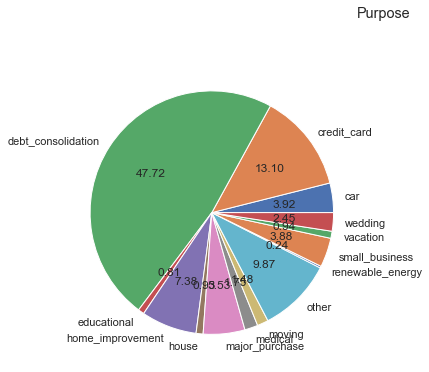

In [228]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect='equal')
loandf.groupby('purpose').size().plot(kind='pie', autopct='%.2f')
plt.axis('off')
plt.suptitle("Purpose")

**Observation** <br />
47% people have taken loan for debt consolidaton purpose <br />
13% people have takne LC loan for credit card purpose <br />


In [229]:
loandf.addr_state.dtype

dtype('O')

Text(0.5, 1.0, 'Address State')

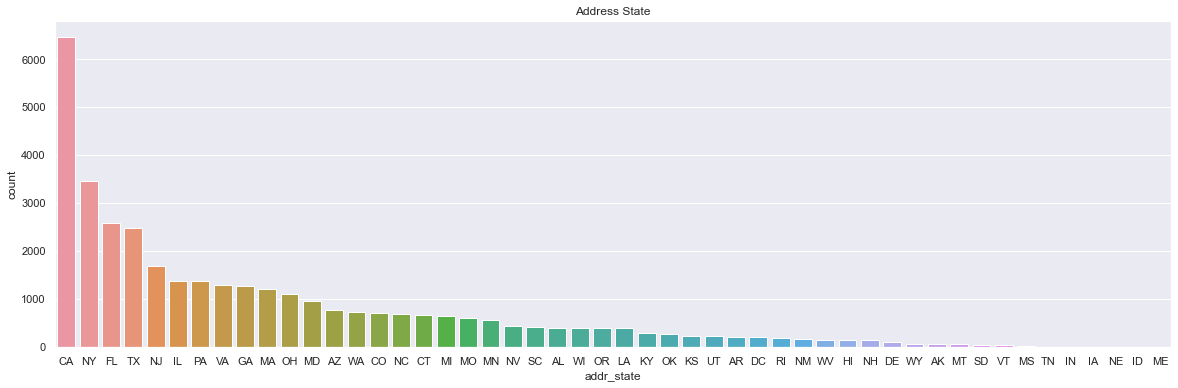

In [230]:

plt.figure(figsize=(20,6))
sns.countplot(x='addr_state', data=loandf, order=loandf.addr_state.value_counts().index)
plt.title('Address State')


**Observation** <br />
We have highest borrowers from CA,NY,FL,TX,NJ state 

In [231]:
loandf.pub_rec.dtype

dtype('int64')

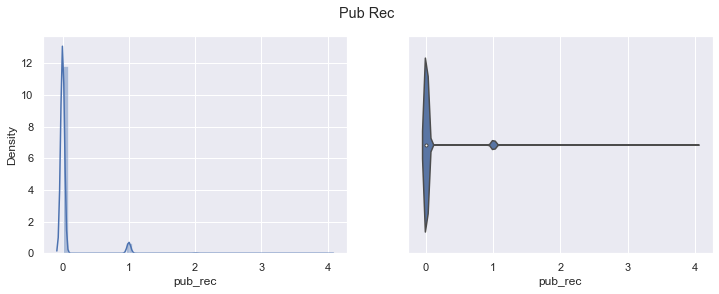

count    36021.000000
mean         0.053746
std          0.234926
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64


In [232]:
sns.set(rc={"figure.figsize": (12, 4)});
plt.subplot(1,2,1)
ax = sns.distplot(loandf.pub_rec)
plt.suptitle('Pub Rec')
plt.subplot(1,2,2)
ax1=sns.violinplot(x=loandf["pub_rec"])
plt.show()
print(loandf.pub_rec.describe())

**Observation** <br />

LC has approx 90% of people having 0 Number of derogatory public records

## Segmented Univariate Analysis

Here In our case study We will be performing Segmented Univariate Analysis on Loan Amount and Pub rec based on Term,Grade,House Ownership, purpose,verification status

Text(0.5, 1.0, 'Fig-1.5: purpose vs Loan Amount')

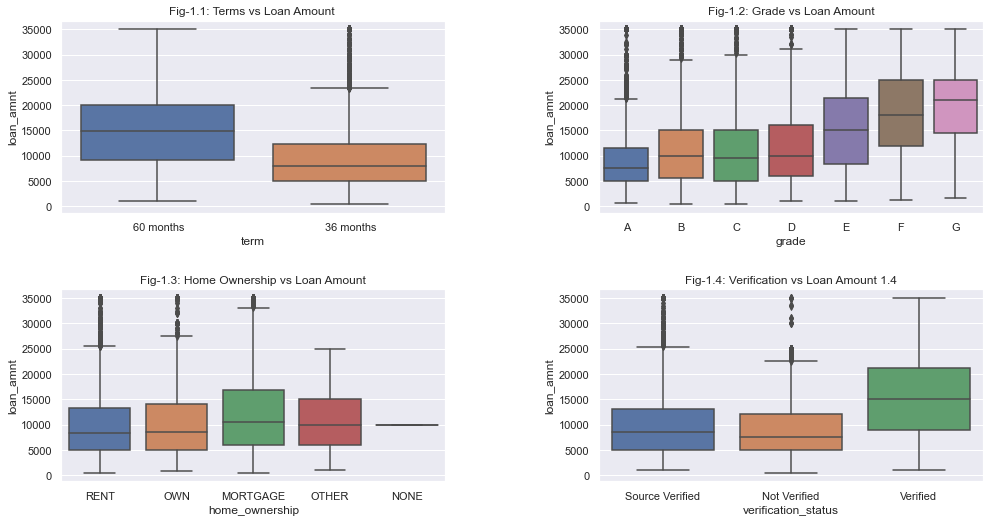

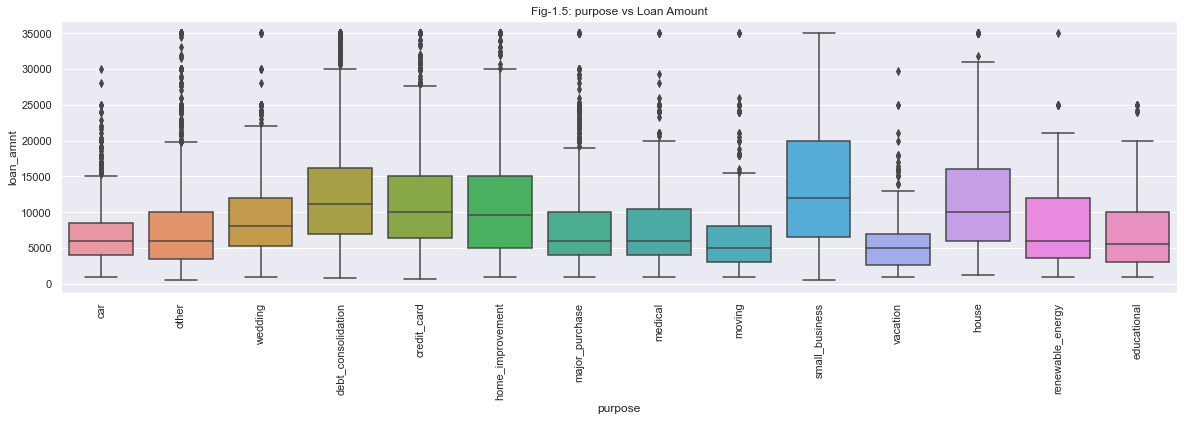

In [233]:
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.boxplot(x='term', y=loandf.loan_amnt, data=loandf)
plt.title('Fig-1.1: Terms vs Loan Amount ')
plt.subplot(222)
sns.boxplot(x='grade', y=loandf.loan_amnt, data=loandf,order=["A","B","C","D","E","F","G"])
plt.title('Fig-1.2: Grade vs Loan Amount')
plt.subplot(223)
sns.boxplot(x='home_ownership', y=loandf.loan_amnt, data=loandf)

plt.title('Fig-1.3: Home Ownership vs Loan Amount')
plt.subplot(224)
sns.boxplot(x='verification_status', y=loandf.loan_amnt, data=loandf)
plt.title('Fig-1.4: Verification vs Loan Amount 1.4')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loandf.loan_amnt, data=loandf)
plt.xticks(rotation=90)
plt.title('Fig-1.5: purpose vs Loan Amount')


**Observation on Loan Amount**
<p><b>Loan Amount vs Term:</b> In above fig-1.1 we can visualise that <b><i>Higher The Loan Amount, Higher The Loan tenure</|i></b></p>
<p><b>Loan Amount vs Grade:</b> In above fig-1.2 we can visualise that <b><i>The Borrowers having grade G and H has taken highest loan amount whreas we can also see the count of loan increases when we have less Grade like B and A </i></b></p>
<p><b>Loan Amount vs Home Ownership:</b> In above fig-1.3 we can visualise that <b><i>Mortgage have high Loan amount also have high number of borrowers</i></b></p>
<p><b>Loan Amount vs Verification Status:</b> In above fig-1.4 we can visualise that <b><i>verified source borrowers are getting highest laon amount, and the average verfied loan amount exist between 9k to 13k range</i></b></p>
<p><b>Loan Amount vs  Purpose:</b> In above fig-1.5 we can visualise that <b><i>Small Business boroowers are getting highest loan amount whereas we have more borrowers from debt consolidation</i></b></p>

<b>Notes:</b> We can perform similar analysis for features like annual_inc, int_rate etc.

## Bivariate Analysis

**Loan Status And Term**

[Text(0.5, 0, 'Term'), Text(0, 0.5, 'Count')]

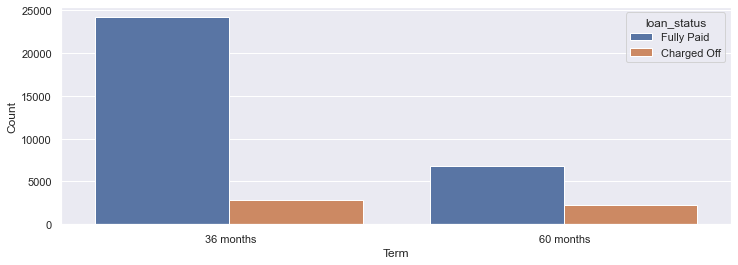

In [234]:
term_status=loandf.groupby(["loan_status","term"])['member_id'].count().reset_index()
ax=sns.barplot(x='term', y='member_id', hue='loan_status', data=term_status, hue_order = ['Fully Paid', 'Charged Off'])
ax.set(xlabel='Term', ylabel='Count')

In [235]:
term_status["percentage"]=term_status.apply(lambda x: x["member_id"]*100/term_status.groupby("loan_status")["member_id"].sum()[0] if x["loan_status"]=="Charged Off" else x["member_id"]*100/term_status.groupby("loan_status")["member_id"].sum()[1],axis=1)
term_status

,loan_status,term,member_id,percentage
0,Charged Off,36 months,2842,56.221563
1,Charged Off,60 months,2213,43.778437
2,Fully Paid,36 months,24189,78.114706
3,Fully Paid,60 months,6777,21.885294


**Observation**

By seeing above chart we can analyse that Charged off is higher in 60 months compare to 36 months term becaues number of borrowers are less in 60 months hence we can state that Borrowers who have 60 months term  have higher chances of charged off.

**Loan Status And Grade**

[Text(0.5, 0, 'Grade'), Text(0, 0.5, 'Count')]

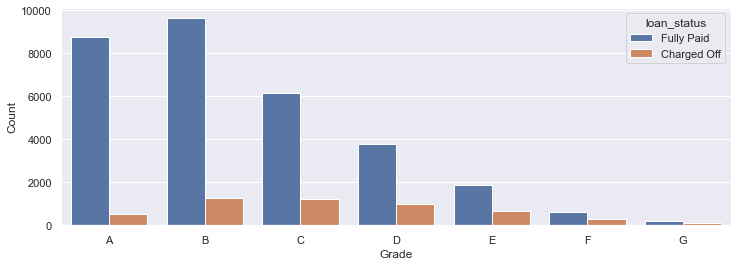

In [236]:
grade_status=loandf.groupby(["loan_status","grade"])['member_id'].count().reset_index()
ax=sns.barplot(x='grade', y='member_id', hue='loan_status', data=grade_status, hue_order = ['Fully Paid', 'Charged Off'])
ax.set(xlabel='Grade', ylabel='Count')

In [237]:
grade_status["percentage"]=grade_status.apply(lambda x: x["member_id"]*100/grade_status.groupby("loan_status")["member_id"].sum()[0] if x["loan_status"]=="Charged Off" else x["member_id"]*100/grade_status.groupby("loan_status")["member_id"].sum()[1],axis=1)
grade_status

,loan_status,grade,member_id,percentage
0,Charged Off,A,518,10.247280
1,Charged Off,B,1281,25.341246
2,Charged Off,C,1203,23.798220
3,Charged Off,D,1011,20.000000
4,Charged Off,E,658,13.016815
5,Charged Off,F,291,5.756677
6,Charged Off,G,93,1.839763
7,Fully Paid,A,8744,28.237422
8,Fully Paid,B,9636,31.118000
9,Fully Paid,C,6154,19.873410


**Observation** <br />
LC Grade B,C and D having highest charged off and we can also see that when the grade decreases the charged off increase


**Loan Status And Purpose**

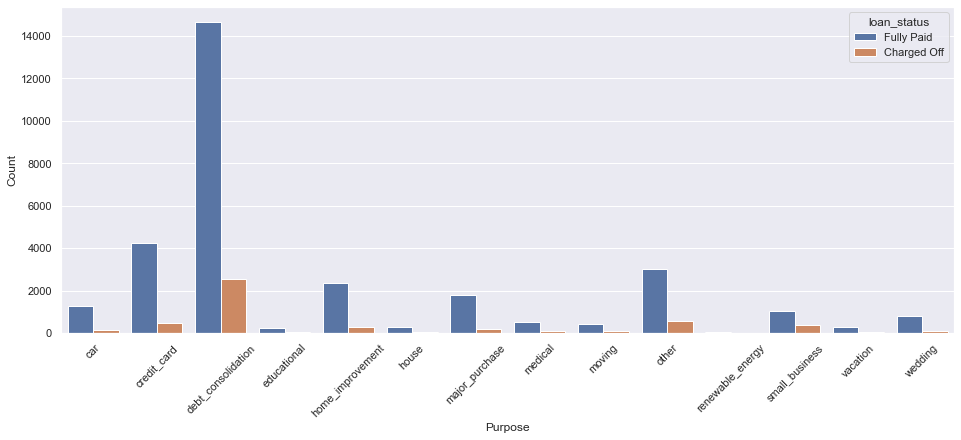

In [238]:
sns.set(rc={"figure.figsize": (16, 6)});
purpose_status=loandf.groupby(["loan_status","purpose"])['member_id'].count().reset_index()
ax=sns.barplot(x='purpose', y='member_id', hue='loan_status', data=purpose_status, hue_order = ['Fully Paid', 'Charged Off'])
ax.set(xlabel='Purpose', ylabel='Count')
ax.tick_params(axis='x', rotation=45)

In [239]:
purpose_status["percentage"]=purpose_status.apply(lambda x: x["member_id"]*100/purpose_status.groupby("loan_status")["member_id"].sum()[0] if x["loan_status"]=="Charged Off" else x["member_id"]*100/purpose_status.groupby("loan_status")["member_id"].sum()[1],axis=1)
purpose_status

,loan_status,purpose,member_id,percentage
0,Charged Off,car,151,2.987141
1,Charged Off,credit_card,487,9.634026
2,Charged Off,debt_consolidation,2558,50.603363
3,Charged Off,educational,48,0.949555
4,Charged Off,home_improvement,305,6.033630
5,Charged Off,house,53,1.048467
6,Charged Off,major_purchase,194,3.837784
7,Charged Off,medical,96,1.899110
8,Charged Off,moving,82,1.622156
9,Charged Off,other,560,11.078140


**Obervation:** <br />
debt_consolidation, other and Credit card have highest charged off